<h1>palAI & mAIs: Comparative Analysis of Machine
Learning Algorithms for Forecasting Palay and
Corn Production in Region VI (Western Visayas)</h1>

<h3>CMSC 197 Mini Project</h3>
<h4>AI Powered-Team (Manejo, Pajarilla, Vito)</h4>

>
>
</ul>


<h3>Table of Contents</h3>

<ul>
    <li>Preprocessing</li>
    <li>Data Analysis</li>
    <li>Implementation of Machine Learning Algorithms
        <ul>
		<li>Linear Regression</li>
            <li>Random Forest Regression</li>
            <li>Support Vector Regression</li>
            <li> K-Nearest Neighbor (KNN)</li>
            <li>XGBoost</li>
            <li>Artificial Neural Network (ANN)</li>
        </ul>
    </li>
</ul>

<hr>
<h2> Preprocessing </h2>
<hr>

<h4> Importing Libraries </h4>

In [57]:
# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### machine learning algorithms ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### metrics of evaluation ####
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import PredictionErrorDisplay

### time series ###
from statsmodels.tsa.seasonal import seasonal_decompose

<h4> Load production volume and area harvested dataset </h4>

In [58]:
# mount from drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
# load the CSV file for volume of production

production_data = pd.read_csv('/content/drive/MyDrive/FOURTH YEAR/Subjects/CMSC 197/Project_197/dataset/Production_volume.csv')
area_data = pd.read_csv('/content/drive/MyDrive/FOURTH YEAR/Subjects/CMSC 197/Project_197/dataset/Area_harvested.csv')

In [60]:
production_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,19309,8971,7603,15727,23007,4255,16790,11766,...,21812.54,7994.02,12843.31,20642.70,17725.19,4504.00,8023.29,20508.02,16674.00,2113.00
1,NaN,Antique,28275,7440,8542,22786,24485,4366,13921,13356,...,48447.00,19146.00,68364.00,46723.97,49682.35,16465.82,47858.70,46714.90,44793.44,12032.20
2,NaN,Capiz,18540,805,406,21903,17872,0,18969,7314,...,32306.30,12063.00,34517.30,25112.06,34479.18,14151.29,26893.60,16226.75,34625.30,12522.75
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,4328.00,911.00,6036.00,5334.00,5139.00,1020.00,4047.00,6451.00,3837.00,344.00
4,NaN,Iloilo,58187,14743,6823,81600,81691,1256,57985,65076,...,148946.00,14692.00,144971.00,106234.00,155663.00,9195.87,130644.00,160041.35,149292.00,6048.66


In [61]:
area_data.head(5)

,Croptype,Province,Quarter 1 1987,Quarter 2 1987,Quarter 3 1987,Quarter 4 1987,Quarter 1 1988,Quarter 2 1988,Quarter 3 1988,Quarter 4 1988,...,Quarter 1 2022,Quarter 2 2022,Quarter 3 2022,Quarter 4 2022,Quarter 1 2023,Quarter 2 2023,Quarter 3 2023,Quarter 4 2023,Quarter 1 2024,Quarter 2 2024
0,Irrigated Palay,Aklan,6130,3440,2290,6890,7510,1610,6770,4440,...,6668.0,2461.18,4662,5832.77,6696.0,2171,3067,5940,6094,1138
1,NaN,Antique,9030,2430,2590,6350,9430,1620,4310,4770,...,12115.0,5903.00,15630,11325.00,12202.0,4452,10647,11220,12384,3506
2,NaN,Capiz,6300,520,100,5860,5830,0,4790,1940,...,9210.0,4508.00,8470,6704.00,9876.0,4648,6870,5000,9880,4143
3,NaN,Guimaras,0,0,0,0,0,0,0,0,...,1380.0,279.88,1534,1439.00,1330.0,350,1121,1821,1258,190
4,NaN,Iloilo,21270,6030,1850,23310,26270,440,16520,19140,...,41245.0,4235.00,41123,29142.00,42500.0,2658,38145,44625,43392,2124


<h4>Transforming and merging data</h4>

In [62]:
production_data = pd.melt(production_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Production')

area_data = pd.melt(area_data,
                        id_vars=['Croptype', 'Province'],
                        var_name='Quarter and Year',
                        value_name='Area')

# fill values for croptype
production_data['Croptype'] = production_data['Croptype'].ffill()
area_data['Croptype'] = area_data['Croptype'].ffill()

dataset = pd.merge(production_data, area_data, on=['Croptype', 'Province', 'Quarter and Year'], how='left')

In [63]:
dataset.head(5)

,Croptype,Province,Quarter and Year,Production,Area
0,Irrigated Palay,Aklan,Quarter 1 1987,19309.0,6130.0
1,Irrigated Palay,Antique,Quarter 1 1987,28275.0,9030.0
2,Irrigated Palay,Capiz,Quarter 1 1987,18540.0,6300.0
3,Irrigated Palay,Guimaras,Quarter 1 1987,0.0,0.0
4,Irrigated Palay,Iloilo,Quarter 1 1987,58187.0,21270.0


In [64]:
# split year and quarter into separte columns
dataset['Year'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[-1]))
dataset['Quarter'] = dataset['Quarter and Year'].apply(lambda x: int(x.split(' ')[1][-1]))

# drop 'Quarter and Year' column
dataset.drop(columns=['Quarter and Year'], inplace=True)

# reorder columns
dataset = dataset[['Croptype', 'Province', 'Quarter', 'Year', 'Area', 'Production']]

In [65]:
dataset.head(5)

,Croptype,Province,Quarter,Year,Area,Production
0,Irrigated Palay,Aklan,1,1987,6130.0,19309.0
1,Irrigated Palay,Antique,1,1987,9030.0,28275.0
2,Irrigated Palay,Capiz,1,1987,6300.0,18540.0
3,Irrigated Palay,Guimaras,1,1987,0.0,0.0
4,Irrigated Palay,Iloilo,1,1987,21270.0,58187.0


<h4>Check for duplication and missing values</h4>

In [66]:
print ("Duplication: ")
dataset.duplicated().sum()

print ("Missing Values: ")
dataset.isnull().sum()

Duplication: 
Missing Values: 


,0
Croptype,0
Province,0
Quarter,0
Year,0
Area,0
Production,0


<h4>Set date as index</h4>

In [67]:
# Map Quarter to start date of each quarter
quarter_to_date = {
    1: '-01-01',  # Q1: January 1st
    2: '-04-01',  # Q2: April 1st
    3: '-07-01',  # Q3: July 1st
    4: '-10-01'   # Q4: October 1st
}

# Create a 'Date' column by combining 'Year' and 'Quarter'
dataset['Date'] = dataset['Year'].astype(str) + dataset['Quarter'].map(quarter_to_date)

# Convert the 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Set 'Date' as the index
dataset.set_index('Date', inplace=True)

# Drop 'Quarter' and 'Year' since they're no longer needed
dataset.drop(columns=['Quarter', 'Year'], inplace=True)

In [68]:
dataset.head(5)

,Croptype,Province,Area,Production
Date,,,,
1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0
1987-01-01,Irrigated Palay,Antique,9030.0,28275.0
1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0
1987-01-01,Irrigated Palay,Guimaras,0.0,0.0
1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0


<h4>Handling non-numeric and zeros</h4>

In [69]:
# handling zeros with forward filling
dataset['Production'] = dataset['Production'].replace(0, np.nan).ffill()
dataset['Area'] = dataset['Area'].replace(0, np.nan).ffill()

# convert 'Production' and 'Area' columns to numeric, coercing errors to NaN (if any non-numeric values exist)
dataset['Production'] = pd.to_numeric(dataset['Production'], errors='coerce')
dataset['Area'] = pd.to_numeric(dataset['Area'], errors='coerce')

# add yield column
dataset['Yield'] = dataset['Production'] / dataset ['Area']

In [70]:
dataset.head(5)

,Croptype,Province,Area,Production,Yield
Date,,,,,
1987-01-01,Irrigated Palay,Aklan,6130.0,19309.0,3.149918
1987-01-01,Irrigated Palay,Antique,9030.0,28275.0,3.131229
1987-01-01,Irrigated Palay,Capiz,6300.0,18540.0,2.942857
1987-01-01,Irrigated Palay,Guimaras,6300.0,18540.0,2.942857
1987-01-01,Irrigated Palay,Iloilo,21270.0,58187.0,2.735637


<hr>
<h2> Data Analysis </h2>
<hr>

Nag add lang me as many as possible. We'll delete lang ang iba na unnecessary for analysis.

In [22]:
# descriptive statistics for numeric columns
descriptive_stats = dataset[['Production', 'Area', 'Yield']].describe()

# display descriptive statistics
descriptive_stats

,Production,Area,Yield
count,4500.000000,4500.000000,4500.000000
mean,27715.606391,9444.710053,2.297394
std,53518.674403,17358.959715,1.144750
min,0.700000,1.000000,0.152174
25%,333.250000,248.750000,1.240585
50%,5465.500000,2553.000000,2.415766
75%,27771.750000,9232.500000,3.199997
max,411113.000000,115071.000000,5.913212


In [23]:
# aggregation by Province
province_summary = dataset.groupby('Province').agg({
    'Area': 'sum',
    'Production': 'sum',
    'Yield': 'mean'
}).reset_index()

province_summary

,Province,Area,Production,Yield
0,Aklan,4325356.52,12126037.47,2.160772
1,Antique,5694202.76,17782362.62,2.389162
2,Capiz,9100195.00,25343783.02,2.414948
3,Guimaras,3046945.96,7549460.72,1.926849
4,Iloilo,20334495.00,61918584.93,2.595241


In [24]:
# aggregation by Croptype (since more data is available across different dates)
croptype_summary = dataset.groupby('Croptype').agg({
    'Area': 'sum',
    'Production': 'sum',
    'Yield': 'mean'
}).reset_index()

croptype_summary

,Croptype,Area,Production,Yield
0,Corn,1858536.42,4645849.15,1.849715
1,Irrigated Palay,7412877.83,25872050.53,3.343308
2,Palay,17849831.20,53539120.23,2.848982
3,Rainfed Palay,10598195.37,28054472.70,2.385716
4,White Corn,3252806.34,8500711.67,1.315203
5,Yellow Corn,1528948.08,4108024.48,2.041443


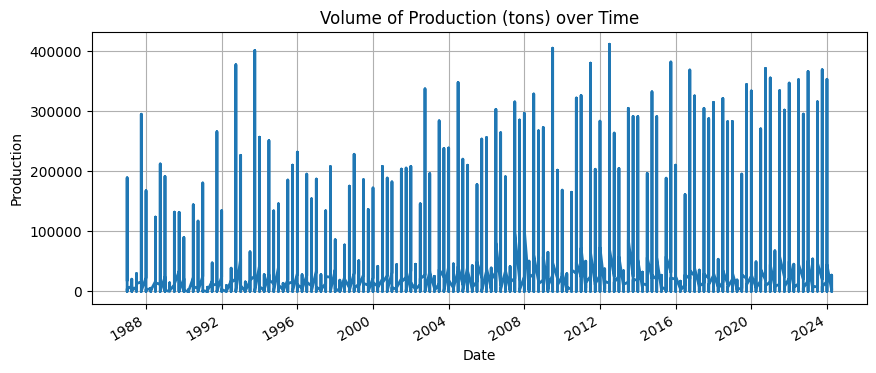

In [25]:
# visualizing the trend of 'Production' over time
plt.figure(figsize=(10, 4))
dataset['Production'].plot(title="Volume of Production (tons) over Time", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Production')
plt.grid(True)
plt.show()

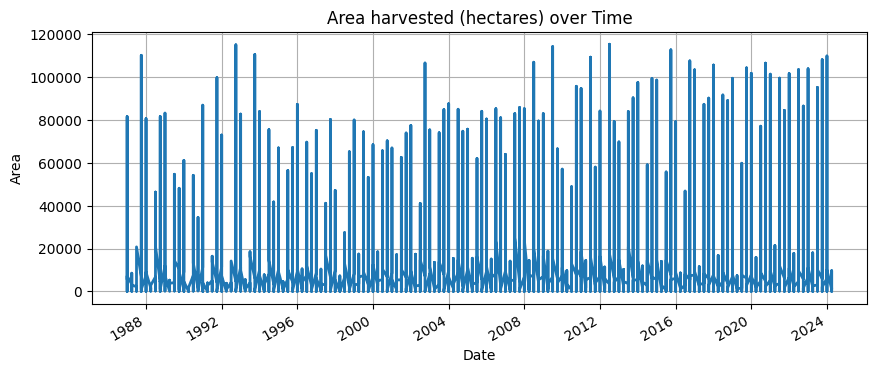

In [26]:
# visualizing the trend of 'Area' over time
plt.figure(figsize=(10, 4))
dataset['Area'].plot(title="Area harvested (hectares) over Time", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Area')
plt.grid(True)
plt.show()

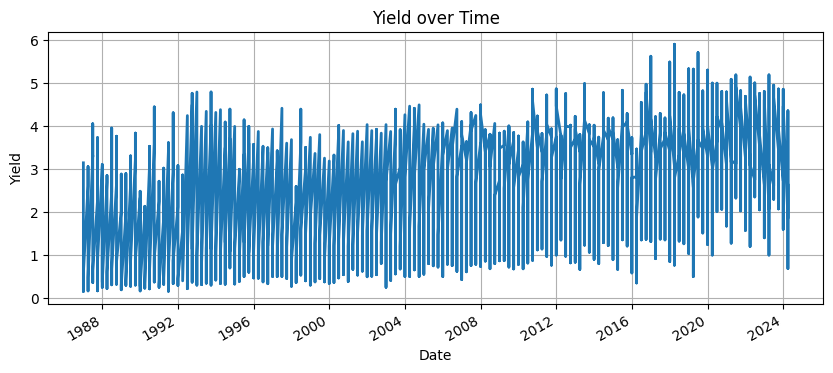

In [27]:
# trend of 'Production' over time
plt.figure(figsize=(10, 4))
dataset['Yield'].plot(title="Yield over Time", linewidth=2)
plt.xlabel('Date')
plt.ylabel('Yield')
plt.grid(True)
plt.show()

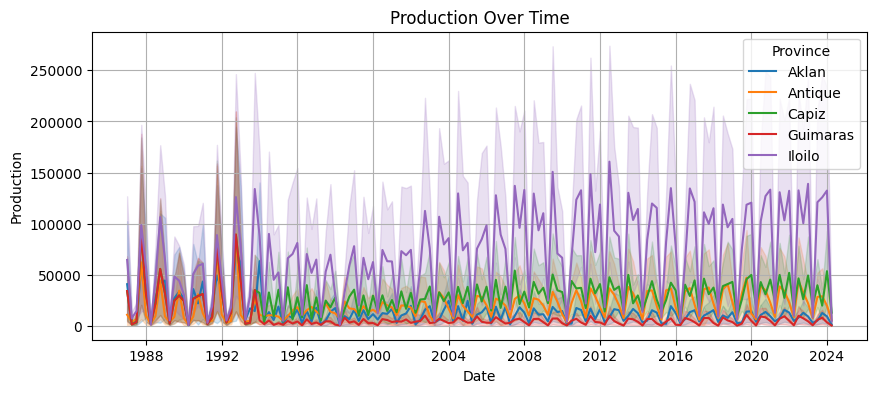

In [28]:
# plot production over time (province as hue)
plt.figure(figsize=(10, 4))
sns.lineplot(data=dataset, x=dataset.index, y='Production', hue='Province')
plt.title('Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend(title='Province')
plt.grid(True)
plt.show()

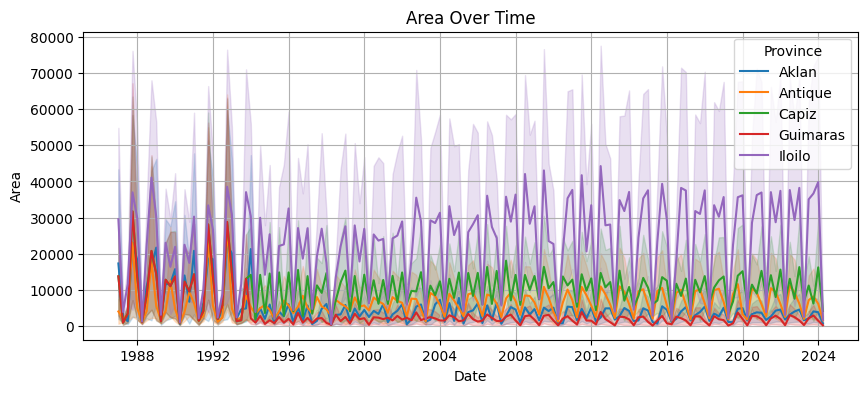

In [29]:
# plot area over time (province as hue)
plt.figure(figsize=(10, 4))
sns.lineplot(data=dataset, x=dataset.index, y='Area', hue='Province')
plt.title('Area Over Time')
plt.xlabel('Date')
plt.ylabel('Area')
plt.legend(title='Province')
plt.grid(True)
plt.show()

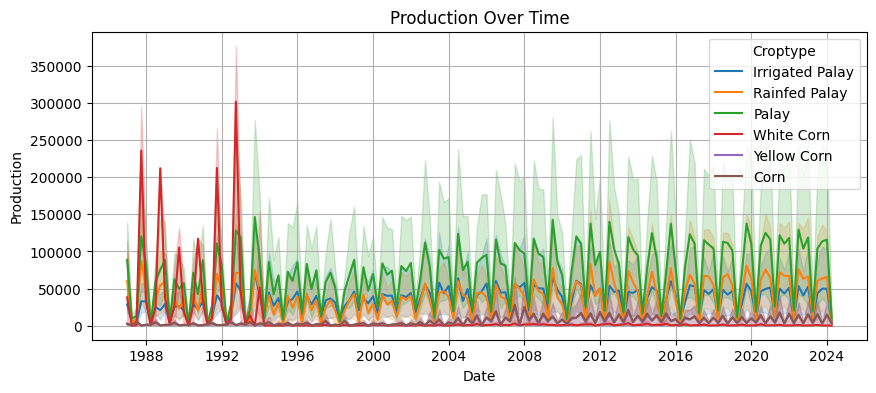

In [30]:
# plot production over time (croptype as hue)
plt.figure(figsize=(10, 4))
sns.lineplot(data=dataset, x=dataset.index, y='Production', hue='Croptype')
plt.title('Production Over Time')
plt.xlabel('Date')
plt.ylabel('Production')
plt.legend(title='Croptype')
plt.grid(True)
plt.show()

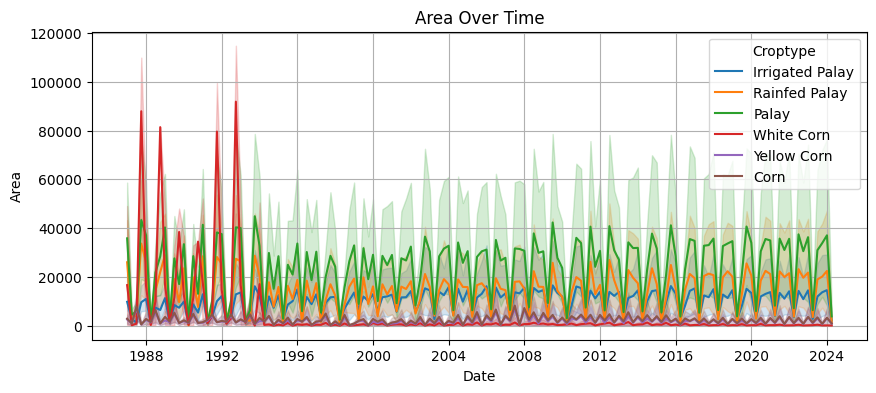

In [31]:
# plot area over time (croptype as hue)
plt.figure(figsize=(10, 4))
sns.lineplot(data=dataset, x=dataset.index, y='Area', hue='Croptype')
plt.title('Area Over Time')
plt.xlabel('Date')
plt.ylabel('Area')
plt.legend(title='Croptype')
plt.grid(True)
plt.show()

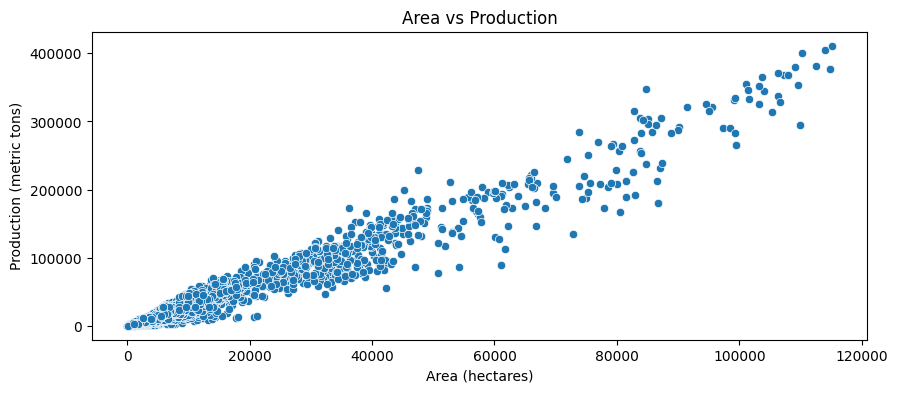

In [32]:
# area vs production
plt.figure(figsize=(10, 4))
sns.scatterplot(x='Area', y='Production', data=dataset)
plt.title('Area vs Production')
plt.xlabel('Area (hectares)')
plt.ylabel('Production (metric tons)')

plt.show()

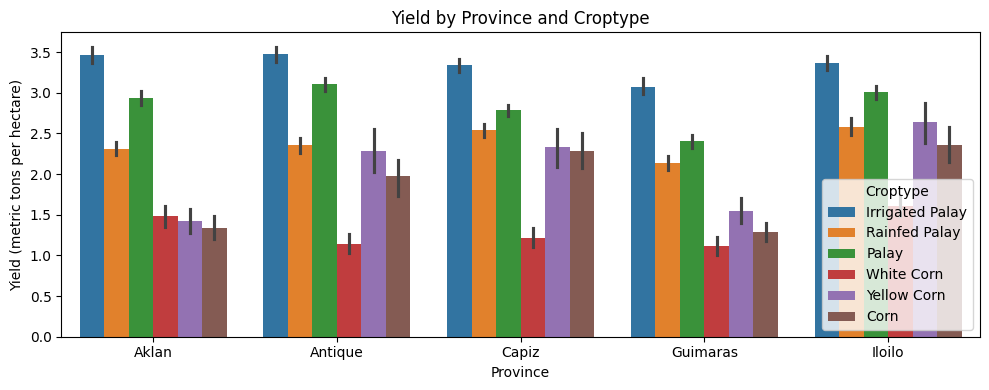

In [33]:
# sisualizing Yield across Provinces with Croptype
plt.figure(figsize=(10, 4))

# create a bar plot with Croptype as the hue to differentiate bars by Croptype
sns.barplot(x='Province', y='Yield', hue='Croptype', data=dataset)

# adding titles and labels
plt.title('Yield by Province and Croptype')
plt.xlabel('Province')
plt.ylabel('Yield (metric tons per hectare)')

# Show the plot
plt.tight_layout()
plt.show()

<hr>
<h2> Implementing Machine Learning Algorithms</h2>
<hr>

<h3>Linear Regression</h3>

In [56]:
dataset['Croptype'].unique()
dataset['Province'].unique()

KeyError: 'Croptype'

In [36]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')

In [37]:
oheTransform = ohe.fit_transform(dataset[['Croptype']])

In [39]:
oheTransform

,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn
Date,,,,,,
1987-01-01,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2024-04-01,1.0,0.0,0.0,0.0,0.0,0.0
2024-04-01,1.0,0.0,0.0,0.0,0.0,0.0
2024-04-01,1.0,0.0,0.0,0.0,0.0,0.0


In [51]:
LR_dataset = pd.concat([dataset, oheTransform], axis=1)

In [52]:
dataset.head(5)

,Province,Area,Production,Yield,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,...,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn,Croptype_Corn,Croptype_Irrigated Palay,Croptype_Palay,Croptype_Rainfed Palay,Croptype_White Corn,Croptype_Yellow Corn
Date,,,,,,,,,,,,,,,,,,,,,
1987-01-01,Aklan,6130.0,19309.0,3.149918,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,Antique,9030.0,28275.0,3.131229,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,Capiz,6300.0,18540.0,2.942857,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,Guimaras,6300.0,18540.0,2.942857,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1987-01-01,Iloilo,21270.0,58187.0,2.735637,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
